In [1]:
from glob import glob
import json
import os
from tqdm import tqdm
import pandas as pd
import itertools

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from nltk.util import ngrams

In [7]:
basepath = '..'
os.listdir(basepath)

['smile_recognition',
 'part-of-speech_tagging',
 'relation_extraction',
 'semantic_role_labeling',
 'sentence_classification',
 'text-to-speech_synthesis',
 'question_similarity',
 'passage_re-ranking',
 'paraphrase_generation',
 'text_generation',
 'text_summarization',
 'semantic_parsing',
 'prosody_prediction',
 'query_wellformedness',
 'sarcasm_detection',
 'topic_models',
 'challenge',
 'sentence_compression',
 'temporal_information_extraction',
 'sentiment_analysis',
 'phrase_grounding',
 'question_generation',
 'question_answering',
 'README.md',
 '.ipynb_checkpoints',
 'natural_language_inference',
 '.git',
 'negation_scope_resolution']

In [8]:
df = []

In [10]:
for f in tqdm(glob(os.path.join(basepath, '*/*/info-units/research-problem.json'))):
    with open(f, 'r') as fd:
        current = json.load(fd)
    input_file = glob(os.path.join(os.path.split(os.path.split(f)[0])[0], '*Stanza-out.txt'))[0]
    with open(input_file) as fd:
        input_text = fd.read()
        
    research_problems = current['has research problem']
    if not isinstance(research_problems[0], list):
        research_problems = [research_problems]
    for rp in research_problems:
        sentence = rp[-1]['from sentence'] if isinstance(rp[-1], dict) and 'from sentence' in rp[-1] else None
        research_problems_filtered = rp[:-1] if sentence else rp
        for rp2 in research_problems_filtered:
            df.append({
                'X': input_text,
                'rp': rp2,
                'from_sentence': sentence
            })

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:00<00:00, 6907.63it/s]


In [11]:
pdf = pd.DataFrame(df)

In [12]:
def helper(x):
    if x is None:
        return None, None
    else:
        idx = x['from_sentence'].index(x['rp'])
        context_left = x['from_sentence'][:idx]
        context_right = x['from_sentence'][idx+len(x['rp']):]
        return context_left, context_right

In [13]:
pdf[['context_left', 'context_right']] = pdf.apply(helper, axis=1, result_type='expand')

In [14]:
english_stopwords = stopwords.words('english')

In [15]:
words= [w for w in itertools.chain(
    *pdf['context_left'].apply(
        word_tokenize).values.tolist()) if w not in english_stopwords and w not in string.punctuation]

In [16]:
pd.DataFrame(words).value_counts()

In                50
paper             47
We                34
A                 33
task              31
                  ..
Common-            1
Transformation     1
Transition         1
Translations       1
's                 1
Length: 1087, dtype: int64

In [19]:
def helper_ngram(x, n):
    tokens = word_tokenize(x)
    #tokens = tokens[-2:]
    tokens = [t for t in tokens if t not in string.punctuation]
    return [' '.join(t) for t in list(ngrams(tokens, n))]

In [20]:
pd.DataFrame(pd.DataFrame(itertools.chain(*pdf['context_left'].apply(
    lambda x: helper_ngram(x, 2)).values.tolist())).value_counts()).head(30)

,0
0,
In this,35
this paper,30
paper we,29
of the,22
Network for,17
we propose,14
task of,14
Networks for,13
This paper,12


In [21]:
pd.DataFrame(pd.DataFrame(itertools.chain(*pdf['context_left'].apply(
    lambda x: helper_ngram(x, 3)).values.tolist())).value_counts()).head(30)

,0
0,
this paper we,29
In this paper,27
paper we propose,10
the task of,9
we propose a,8
the problem of,8
Attention Network for,7
of the art,7
In this work,6


In [22]:
pd.DataFrame(pd.DataFrame(itertools.chain(*pdf['context_left'].apply(
    lambda x: helper_ngram(x, 6)).values.tolist())).value_counts()).head(30)

,0
0,
In this paper we propose a,5
Published as a conference paper at,4
as a conference paper at ICLR,4
some other review based tasks such,3
proposed post training is also applied,3
of the approach the proposed post,3
the generality of the approach the,3
the proposed post training is also,3
approach the proposed post training is,3


In [23]:
bugrams= [w for w in itertools.chain(
    *pdf['context_left'].apply(
        word_tokenize).values.tolist()) if w not in english_stopwords and w not in string.punctuation]

In [24]:
wordcloud_left = WordCloud(collocation_threshold=3, stopwords=[]).generate(' '.join(pdf['context_left'].values.tolist()))

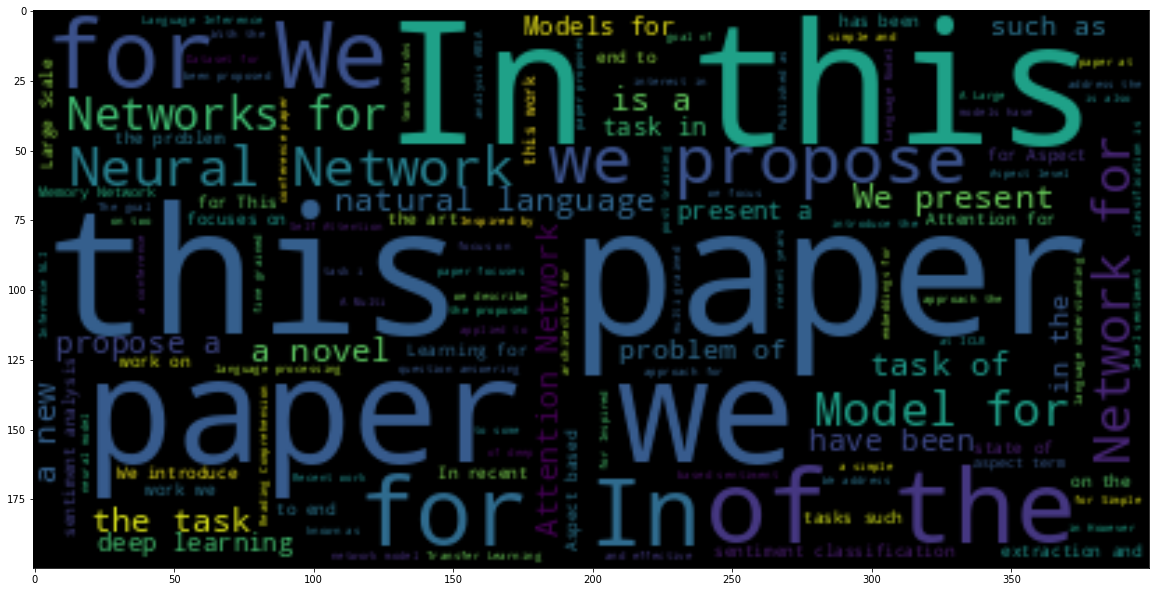

In [25]:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_left, interpolation='bilinear')

In [26]:
wordcloud_right = WordCloud(collocation_threshold=3, stopwords=[]).generate(' '.join(pdf['context_right'].values.tolist()))

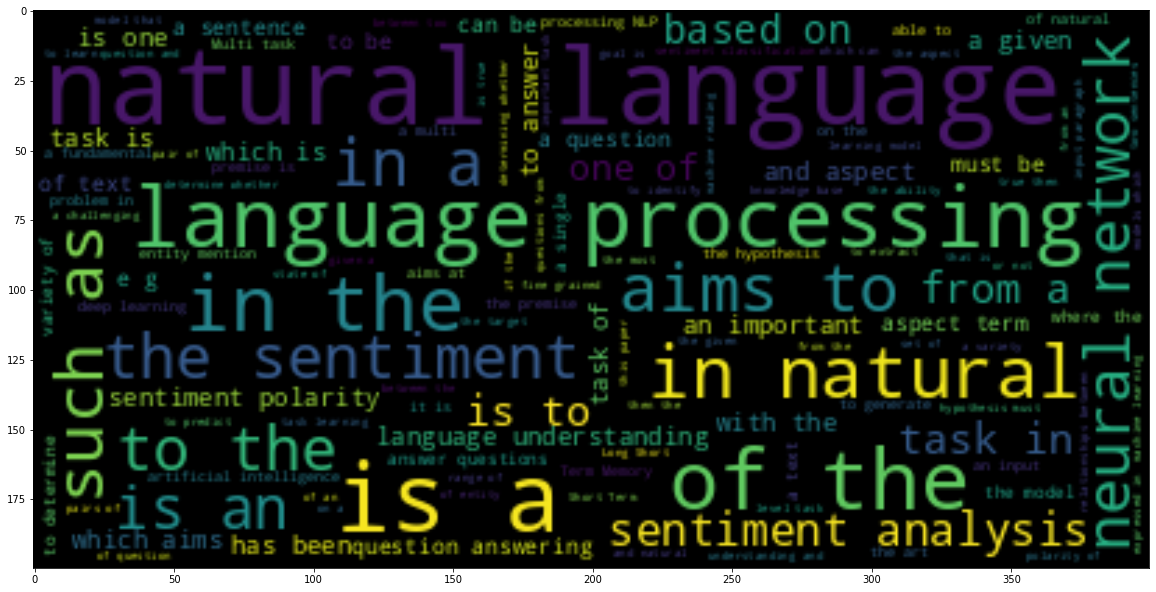

In [27]:
plt.figure(figsize = (20,20))
plt.imshow(wordcloud_right, interpolation='bilinear')

In [28]:
list(itertools.chain(*pdf['context_left'].apply(word_tokenize).values.tolist()))

['Deep',
 'Learning',
 'For',
 'Inspired',
 'by',
 'recent',
 'successes',
 'of',
 'deep',
 'learning',
 'in',
 'computer',
 'vision',
 ',',
 'we',
 'propose',
 'a',
 'novel',
 'application',
 'of',
 'deep',
 'convolutional',
 'neural',
 'networks',
 'to',
 'TRANSFER',
 'LEARNING',
 'FOR',
 'State',
 '-',
 'of',
 '-',
 'the',
 '-',
 'art',
 'We',
 'address',
 'these',
 'issues',
 'and',
 'evaluate',
 'bi',
 '-',
 'LSTMs',
 'with',
 'word',
 ',',
 'character',
 ',',
 'and',
 'unicode',
 'byte',
 'embeddings',
 'for',
 'Learning',
 'Better',
 'Internal',
 'Structure',
 'of',
 'Words',
 'for',
 'A',
 'Novel',
 'Neural',
 'Network',
 'Model',
 'for',
 'Hierarchically',
 '-',
 'Refined',
 'Label',
 'Attention',
 'Network',
 'for',
 'CRF',
 'has',
 'been',
 'used',
 'as',
 'a',
 'powerful',
 'model',
 'for',
 'Robust',
 'Multilingual',
 'In',
 'this',
 'paper',
 ',',
 'we',
 'propose',
 'and',
 'analyze',
 'a',
 'To',
 'address',
 'the',
 'first',
 'problem',
 ',',
 'In',
 'Enriching',
 'Pre

In [29]:
"ciao come stai".index('come')

5

In [30]:
"ciao come stai"[:5]

'ciao '

In [31]:
research_problems[0]

['Negation Detection and Scope Resolution',
 {'from sentence': 'NegBERT : A Transfer Learning Approach for Negation Detection and Scope Resolution'}]

In [32]:
rp

['Negation Detection and Scope Resolution',
 {'from sentence': 'NegBERT : A Transfer Learning Approach for Negation Detection and Scope Resolution'}]

In [33]:
current['has research problem'][6]

IndexError: list index out of range

In [34]:
glob(os.path.join(os.path.split(os.path.split(f)[0])[0], '*Stanza-out.txt'))[0]

'../negation_scope_resolution/0/1911.04211v3-Stanza-out.txt'

In [35]:
current

{'has research problem': [['Negation Detection and Scope Resolution',
   {'from sentence': 'NegBERT : A Transfer Learning Approach for Negation Detection and Scope Resolution'}]]}

In [36]:
current['has research problem'][0][1]

{'from sentence': 'NegBERT : A Transfer Learning Approach for Negation Detection and Scope Resolution'}

# TODO
userei bi o trigrammi e produrrei qualcosa

1. identify the promising sentences
    a. encode words in some way (bow bi/trigrams?)
    b. split in sentences
    c. train something simple (lstm, or maybe just use bi/trigrams)
    d. check on validation?
2. extract the research problem from the sentence

## ideas
ordine è importante: devo usare qualcosa tipo lstm

In [37]:
pdf

,X,rp,from_sentence,context_left,context_right
0,title\nDeep Learning For Smile Recognition\nab...,Smile Recognition,Deep Learning For Smile Recognition,Deep Learning For,
1,title\nDeep Learning For Smile Recognition\nab...,facial expression recognition,Inspired by recent successes of deep learning ...,Inspired by recent successes of deep learning ...,", in particular smile recognition ."
2,title\nTRANSFER LEARNING FOR SEQUENCE TAGGING ...,SEQUENCE TAGGING,TRANSFER LEARNING FOR SEQUENCE TAGGING WITH HI...,TRANSFER LEARNING FOR,WITH HIERARCHICAL RECURRENT NETWORKS
3,title\nEnd - to - end Sequence Labeling via Bi...,End - to - end Sequence Labeling,End - to - end Sequence Labeling via Bi-direct...,,via Bi-directional LSTM-CNNs-CRF
4,title\nEnd - to - end Sequence Labeling via Bi...,sequence labeling,State - of - the - art sequence labeling syste...,State - of - the - art,systems traditionally require large amounts o...
...,...,...,...,...,...
630,title\nPublished as a conference paper at ICLR...,QUESTION ANSWERING,Published as a conference paper at ICLR 2017 Q...,Published as a conference paper at ICLR 2017 Q...,
631,title\nPublished as a conference paper at ICLR...,question answering when reasoning over multipl...,"In this paper , we study the problem of questi...","In this paper , we study the problem of",is required .
632,title\nIterative Alternating Neural Attention ...,Machine Reading,Iterative Alternating Neural Attention for Mac...,Iterative Alternating Neural Attention for,
633,title\nIterative Alternating Neural Attention ...,machine comprehension,We propose a novel neural attention architectu...,We propose a novel neural attention architectu...,"tasks , such as answering Cloze - style queri..."


In [38]:
pdf['X_tokenized'] = pdf['X'].apply(sent_tokenize)

In [39]:
pdf.apply(lambda x: x['from_sentence'] in x['X'], axis=1).sum() /  len(pdf)

1.0

In [40]:
pdf.apply(lambda x: x['from_sentence'] in x['X_tokenized'], axis=1).sum() / len(pdf)

0.2992125984251969

In [41]:
pdf.apply(lambda x: any([x['rp'] in i for i in x['X_tokenized']]), axis=1).sum() / len(pdf)

0.9984251968503937